In [ ]:
!pip install qiskit
!pip install pylatexenc

     |████████████████████████████████| 6.5 MB 5.8 MB/s 
     |████████████████████████████████| 18.0 MB 12.2 MB/s 
     |████████████████████████████████| 240 kB 43.4 MB/s 
     |████████████████████████████████| 200 kB 47.5 MB/s 
     |████████████████████████████████| 54 kB 1.7 MB/s 
     |████████████████████████████████| 111 kB 41.6 MB/s 
     |████████████████████████████████| 1.6 MB 40.9 MB/s 
     |████████████████████████████████| 49 kB 3.8 MB/s 
     |████████████████████████████████| 943 kB 40.8 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 37.5 MB 14 kB/s 
     |████████████████████████████████| 3.6 MB 46.1 MB/s 
     |████████████████████████████████| 113 kB 75.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.0-py3-none-any.whl size=11861 sha256=eb28d8f119fc48668b83ca385c927fab194a68b7263d8e39434e58aebf0fde80
  Stored in directory: /root/.cache/pip/whee

In [ ]:
! pip install h5py

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path='/content/gdrive/MyDrive/avqds'

# 1 Introduction
## 1-1 Quantum Simulation
One of the leading uses for quantum computers will be to simulate quantum systems such as molecules or engineered materials. Actually executing a quantum simulation on a current quantum computer, however, can be difficult and error prone. Your objective for this Open Science Prize is to significantly improve the state-of-the-art for quantum simulation (details in Section 2).

The quantum system you will simulate is a quantum spin-1/2 model, where each qubit represents a quantum spin-1/2 particle in a 1D chain. Quantum spin models have some amazing properties and uses. Computationally speaking, certain optimization problems can be mapped to spin models and hence minimized on a quantum computer. Physically speaking, spin models show a variety of quantum behavior such as large entangled states, quantum phases of matter, quantum many-body affects, and many other open questions in physics research.

There are many different spin models, but we will focus on the $XXX$ Heisenberg spin model. Though it is not as well known as the transverse-field Ising model, the $XXX$ Heisenberg model is of practical and theoretical interest. It can also be difficult to simulate, which is where you come in.

The notebook is organized as follows: 1) Section 1 (labeled 1-X) provides you with brief introductions to the $XXX$ Heisenberg model, time evolving a Hamiltonian, and decomposing a time evolution operator into gates for a quantum computer to execute. 2) Section 2 (labeled 2-X) outlines the specific requirements and boundaries associated with completing and competing in the Open Science Prize. Continuing from Section 1, the notebook showns an example solution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})  # enlarge matplotlib fonts

import qiskit

# Import qubit states Zero (|0>) and One (|1>), and Pauli operators (X, Y, Z)
from qiskit.opflow import Zero, One, I, X, Y, Z
import math
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Returns the matrix representation of the XXX Heisenberg model for 3 spin-1/2 particles in a line
def H_heis3():
    # Interactions (I is the identity matrix; X, Y, and Z are Pauli matricies; ^ is a tensor product)
    XXs = (I^X^X) + (X^X^I)
    YYs = (I^Y^Y) + (Y^Y^I)
    ZZs = (I^Z^Z) + (Z^Z^I)
    
    # Sum interactions
    H = XXs + YYs + ZZs
    
    # Return Hamiltonian
    return H

In [ ]:
# Returns the matrix representation of U_heis3(t) for a given time t assuming an XXX Heisenberg Hamiltonian for 3 spins-1/2 particles in a line
def U_heis3(t):
    # Compute XXX Hamiltonian for 3 spins in a line
    H = H_heis3()
    
    # Return the exponential of -i multipled by time t multipled by the 3 spin XXX Heisenberg Hamilonian 
    return (t * H).exp_i()

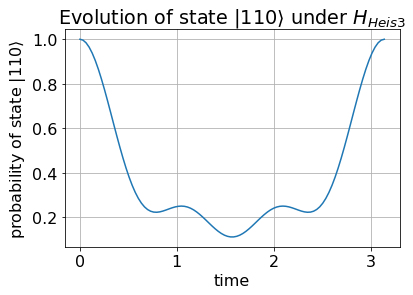

In [ ]:
# Define array of time points
ts = np.linspace(0, np.pi, 100)

# Define initial state |110>
initial_state = One^One^Zero

# Compute probability of remaining in |110> state over the array of time points
 # ~initial_state gives the bra of the initial state (<110|)
 # @ is short hand for matrix multiplication
 # U_heis3(t) is the unitary time evolution at time t
 # t needs to be wrapped with float(t) to avoid a bug
 # (...).eval() returns the inner product <110|U_heis3(t)|110>
 #  np.abs(...)**2 is the modulus squared of the innner product which is the expectation value, or probability, of remaining in |110>
probs_110 = [np.abs((~initial_state @ U_heis3(float(t)) @ initial_state).eval())**2 for t in ts]

# Plot evolution of |110>
plt.plot(ts, probs_110)
plt.xlabel('time')
plt.ylabel(r'probability of state $|110\rangle$')
plt.title(r'Evolution of state $|110\rangle$ under $H_{Heis3}$')
plt.grid()
plt.show()

In [ ]:
# Importing standard Qiskit modules
from qiskit import QuantumCircuit, QuantumRegister, IBMQ, execute, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter

# Import state tomography modules
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

# Qiskit Pulse imports
import qiskit.pulse
from qiskit import pulse
from qiskit.pulse import library

from qiskit import *
from qiskit.pulse import Play, Schedule, DriveChannel, ControlChannel, Waveform, ShiftPhase
from qiskit.pulse.library import drag, GaussianSquare, Drag

from scipy.special import erf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load IBMQ Account data
IBMQ.save_account('',overwrite=True )
IBMQ.load_account()

# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
#provider = IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:

provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')

backend  = provider.get_backend('ibmq_jakarta')

properties = backend.properties()

In [ ]:
# The PassManager helps decide how a circuit should be optimized
# (https://qiskit.org/documentation/tutorials/circuits_advanced/04_transpiler_passes_and_passmanager.html)
from qiskit.transpiler import PassManager

# This function will pull pulse-level calibration values to build RZX gates and tell the PassManager to leave RZX gates alone
from qiskit.transpiler.passes import RZXCalibrationBuilderNoEcho

In [ ]:
params_file=path+'/params_tracepi4.dat'
ansatz_file=path+'/ansatz_pi4.h5'

In [ ]:
import h5py
f_ansatz= h5py.File(ansatz_file, 'r')

In [ ]:
def rzz_qiskit(qc,angle,q1,q0):
    qc.ry(-np.pi/2,q0)
    qc.rzx(angle/2, q1, q0)
    qc.x(q1)
    qc.rzx(-angle/2, q1, q0)
    qc.x(q1)
    qc.ry(np.pi/2,q0)

0.785613


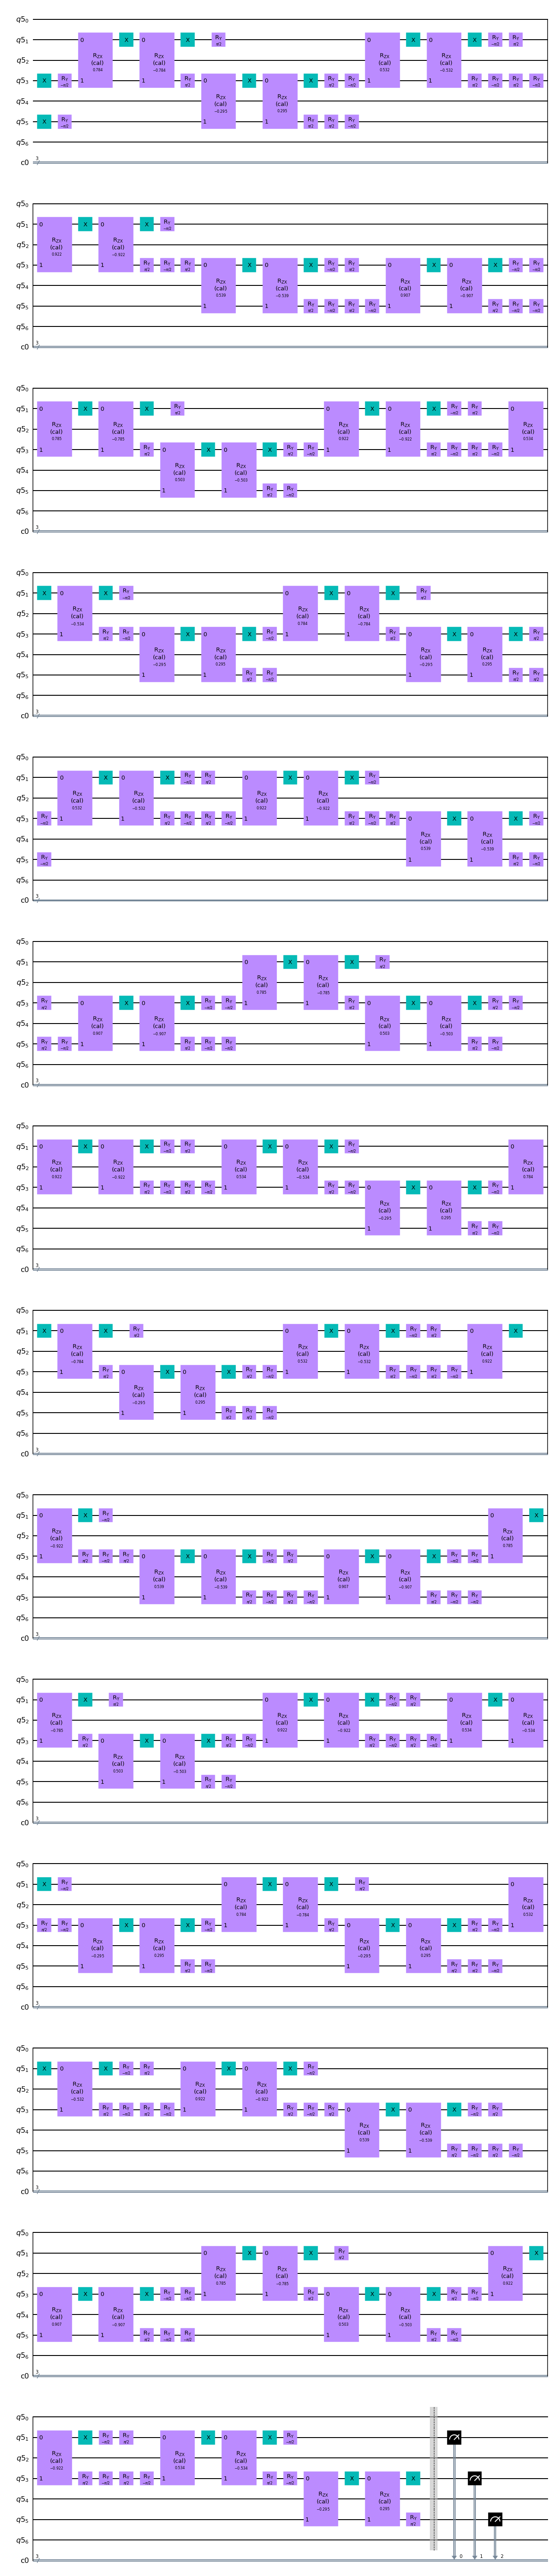

In [ ]:
trotter_steps = 6

target_time = np.pi # trotter_steps * np.pi#/6 #+0.1

target_t=np.pi/4
f = open(params_file, "r")
num_string = f.readline()
pi_closer = 0
del_num = 1000
while num_string != '':
    num = num_string.split()
    time = float(num[0])
    if min(del_num,np.abs(time-target_t))==del_num:
        pass
    else:
        del_num=np.abs(time-target_t)
        pi_closer=time
    num_string = f.readline()

print(pi_closer)
#print qiskit circuit

target_t=np.pi/4
f1= open(params_file, "r")
num_string = f1.readline()
num=num_string.split()
while float(num[0]) != pi_closer:
    num_string = f1.readline()
    num=num_string.split()
    
params=num[1:]

# Initialize quantum circuit for 3 qubits
qr = QuantumRegister(7)
qc = QuantumCircuit(qr)

# Prepare initial state (remember we are only evolving 3 of the 7 qubits on jakarta qubits (q_5, q_3, q_1) corresponding to the state |110>)
qc.x([3,5])  # DO NOT MODIFY (|q_5,q_3,q_1> = |110>)

qlst=[1,3,5]

q0=qlst[0]

q1=qlst[1]

q2=qlst[2]

for _ in range(4):
    for i,op in enumerate(f_ansatz['ansatz_code'][:,:]):
        if op[1]==3:
            rzz_qiskit(qc,float(params[i]),qlst[op[0]],qlst[op[2]])
        elif op[1]==2:
            qc.ry(np.pi/2,[qlst[op[0]],qlst[op[2]]])
            rzz_qiskit(qc,float(params[i]),qlst[op[0]],qlst[op[2]])
            qc.ry(-np.pi/2,[qlst[op[0]],qlst[op[2]]])
        elif op[1]==1:
            qc.ry(np.pi/2,[qlst[op[0]],qlst[op[2]]])
            rzz_qiskit(qc,float(params[i]),qlst[op[0]],qlst[op[2]])
            qc.ry(-np.pi/2,[qlst[op[0]],qlst[op[2]]])
            

# Evaluate simulation at target_time (t=pi) meaning each trotter step evolves pi/trotter_steps in time
#qc = qc.bind_parameters({t: target_time/trotter_steps})

# Generate state tomography circuits to evaluate fidelity of simulation
st_qcs = state_tomography_circuits(qc, [qr[q0], qr[q1], qr[q2]])

pm = PassManager([RZXCalibrationBuilderNoEcho(backend)])
st_qcs_pulse_efficient = pm.run(st_qcs)
st_qcs_pulse_efficient[-1].draw('mpl')


In [ ]:
def DD_circuit_qiskit_pulse(circuit, backend, qubits_list, initial_layout = None, name=False):

  if initial_layout:

    circuit = transpile(circuit, backend, scheduling_method='asap',initial_layout =init_layout)

  else:

    circuit = transpile(circuit, backend, scheduling_method='asap')

  if name:

    DD_cir = QuantumCircuit(*circuit.qregs,*circuit.cregs,name=circuit.name)

  else:

    DD_cir = QuantumCircuit(*circuit.qregs,*circuit.cregs)
  
  for operation in circuit[:]:

    if type(operation[0])==qiskit.circuit.delay.Delay:

      if  operation[0].duration >= 400:

        q_index = operation[1][0].index

        if q_index in qubits_list:

          t=(operation[0].duration-320)//4

          t = math.ceil((t)/16)*16

          DD_cir.delay(t,[q_index],'dt')

          DD_cir.x(q_index)

          DD_cir.delay(2*t,[q_index],'dt')

          DD_cir.z(q_index)

          DD_cir.x(q_index)

          DD_cir.z(q_index)

        else:

          DD_cir.data.append(operation)

      else:
        
        DD_cir.data.append(operation)

    else:

      DD_cir.data.append(operation)

  pm = PassManager([RZXCalibrationBuilderNoEcho(backend)])
  DD_cir_pulse_efficient = pm.run(DD_cir)

  return DD_cir_pulse_efficient

In [ ]:
from qiskit import *

In [ ]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [ ]:
qubits_list = [1,3,5]

cirs=[]

for i in range(len(st_qcs)):

    cir_pulse_efficient=DD_circuit_qiskit_pulse(st_qcs_pulse_efficient[i], backend, qubits_list, name=True )

    cirs.append(cir_pulse_efficient)

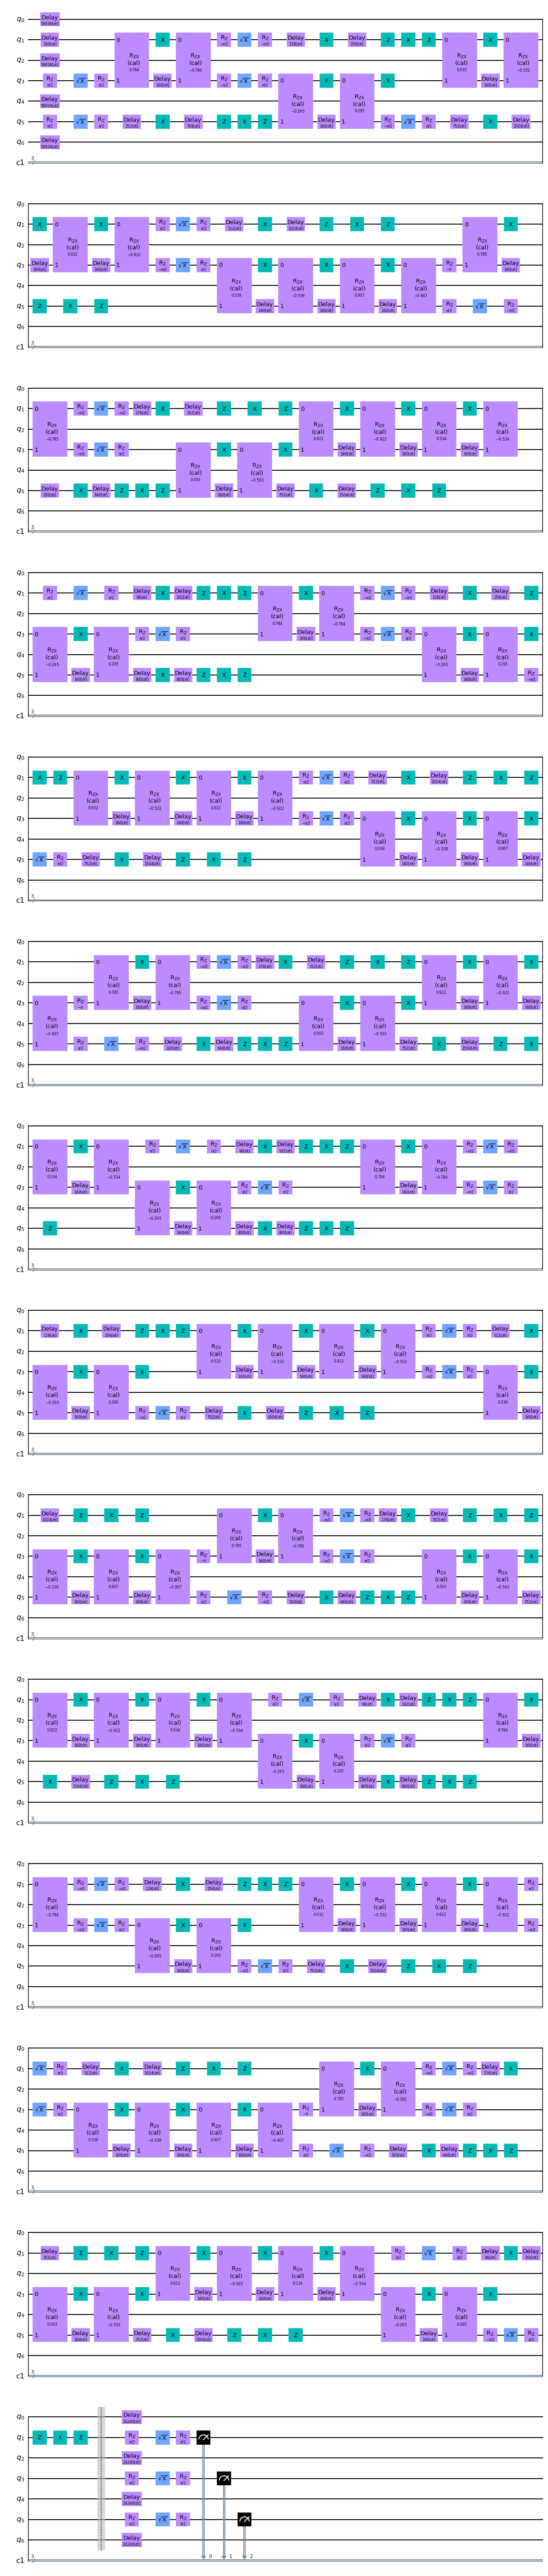

In [ ]:
cirs[0].draw('mpl')

In [ ]:
qubits_list = [q0,q1,q2]

shots=8192

qr = QuantumRegister(len(qubits_list),'q')

meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

In [ ]:

init_layout = {}

for i,j in enumerate(qubits_list):

    init_layout[qr[i]] = j

cal_results = execute(meas_calibs, backend, shots=shots, initial_layout=init_layout)

print('Job ID', cal_results.job_id())

Job ID 624cdbe0aacb9bea725f4128


In [ ]:
shots = 8192
reps =4
#backend = sim_noisy_jakarta
# reps = 8
backend = backend #jakarta

jobs = []
for _ in range(reps):
    # execute
    job = execute(cirs, backend, shots=shots)

    print('Job ID', job.job_id())
    jobs.append(job)

Job ID 624cdbe6aacb9b0bb15f4129
Job ID 624cdbeb4b515275f37c5db0
Job ID 624cdbf1d72033ca6d67cb5a
Job ID 624cdbf7d720338d8867cb5b


In [ ]:
for job in jobs:
    job_monitor(job)
    try:
        if job.error_message() is not None:
            print(job.error_message())
    except:
        pass

Job Status: job is queued (501)

# Job Retrieve

In [ ]:
cal_results=backend.retrieve_job('624cdbe0aacb9bea725f4128')

ids=['624cdbe6aacb9b0bb15f4129','624cdbeb4b515275f37c5db0','624cdbf1d72033ca6d67cb5a','624cdbf7d720338d8867cb5b']
jobs=[]
for id in ids:
  jobs.append(backend.retrieve_job(id))

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results.result(), state_labels)

meas_filter = meas_fitter.filter

In [ ]:
# Compute the state tomography based on the st_qcs quantum circuits and the results from those ciricuits
def state_tomo(result, st_qcs): #, time):
    # The expected final state; necessary to determine state tomography fidelity
    target_state = (One^One^Zero).to_matrix()  # DO NOT MODIFY (|q_5,q_3,q_1> = |110>)
    # Fit state tomography results
    initial_state = One^One^Zero

    #target_state = (U_heis3(float(time)) @ initial_state).eval().to_matrix()

    mit_result = meas_fitter.filter.apply(result)

    tomo_fitter = StateTomographyFitter(mit_result, st_qcs)

    rho_fit = tomo_fitter.fit(method='lstsq')
    # Compute fidelity
    fid = state_fidelity(rho_fit, target_state)
    return fid

# Compute tomography fidelities for each repetition

fids = []
#target_time=trotter_steps * np.pi/10
for job in jobs:
    fid = state_tomo(job.result(), st_qcs)#, target_time)
    fids.append(fid)
    
print('state tomography fidelity = {:.4f} \u00B1 {:.4f}'.format(np.mean(fids), np.std(fids)))

state tomography fidelity = 0.7044 ± 0.0084


In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table